1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
 related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Importing the libaries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"]= (12, 7)

Reading the dataset

In [218]:
data = pd.read_csv('bank-marketing.csv')

Looking at the data

In [219]:
data

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Checking For null values

In [220]:
data.isnull().sum()/data.shape[0]

age          0.0
job          0.0
salary       0.0
marital      0.0
education    0.0
targeted     0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
response     0.0
dtype: float64

Checking the target variable distribution

In [221]:
count = data.groupby('response').size()
percent = count/len(data)*100
print(percent)

response
no     88.30152
yes    11.69848
dtype: float64


To reduce the outliers in the dataset for numerical columns we will restrict the values in between the min and max value passed by us i replaced by the mean of the column. 

In [222]:
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

Check the Age columnn with respect to target variable.

<AxesSubplot:xlabel='response', ylabel='age'>

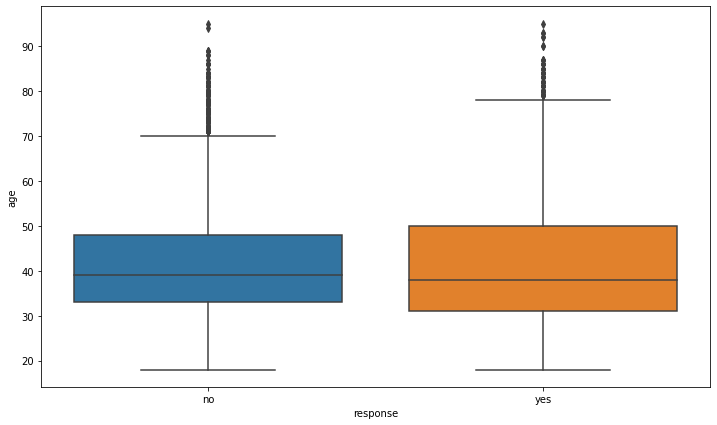

In [223]:
sns.boxplot(x='response', y='age', data=data)

Check the Balance columnn with respect to target variable.

<AxesSubplot:xlabel='response', ylabel='balance'>

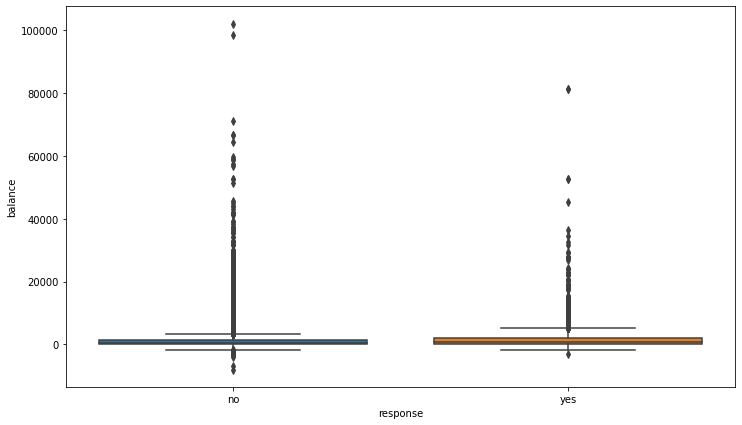

In [224]:
sns.boxplot(x='response', y='balance', data=data)

Imputing the Balance column

In [225]:
dataset_new = data
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

Checking the Balance Column after imputation

<AxesSubplot:xlabel='response', ylabel='balance'>

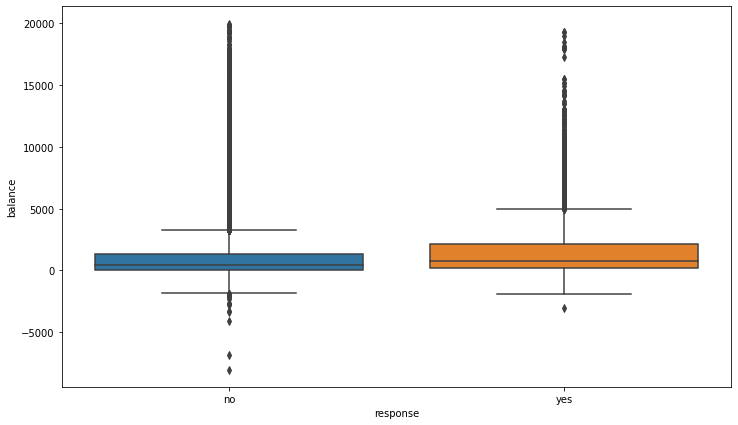

In [226]:
sns.boxplot(x='response', y='balance', data=dataset_new)

Check the Day columnn with respect to target variable.

<AxesSubplot:xlabel='response', ylabel='day'>

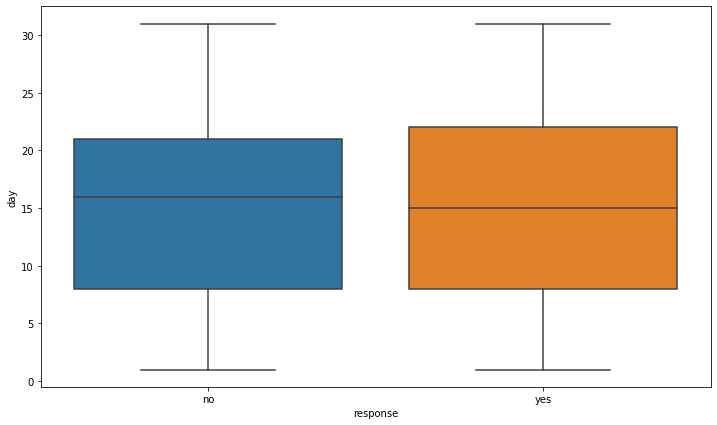

In [227]:
sns.boxplot(x='response', y='day', data=dataset_new)

Check the Duration columnn with respect to target variable.

<AxesSubplot:xlabel='response', ylabel='duration'>

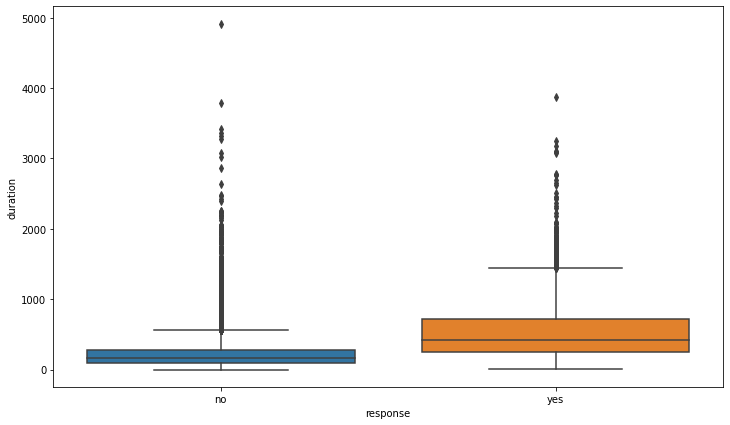

In [228]:
sns.boxplot(x='response', y='duration', data=dataset_new)

Imputing the Duration column with max value 2000

In [229]:
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

Checking the Duration column after imputation

<AxesSubplot:xlabel='response', ylabel='duration'>

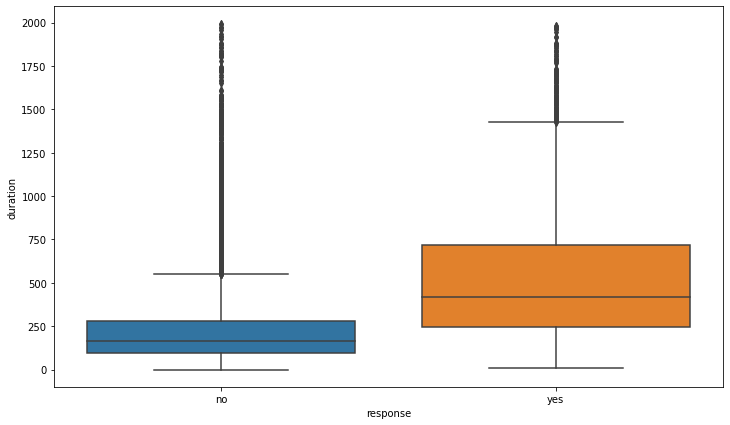

In [230]:
sns.boxplot(x='response', y='duration', data=dataset_new)

Check the Duration columnn with respect to target variable.

<AxesSubplot:xlabel='response', ylabel='campaign'>

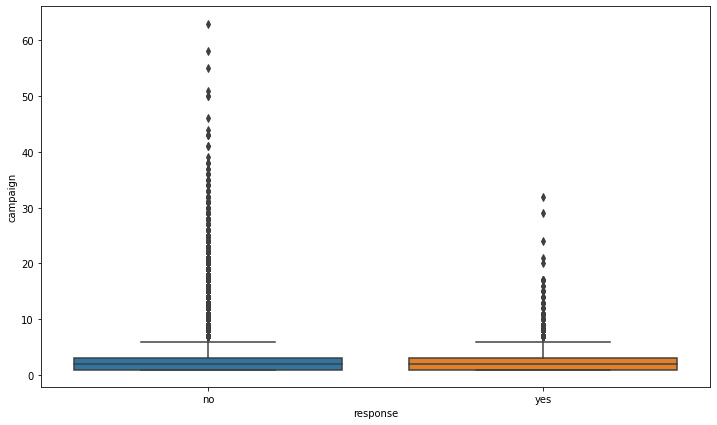

In [231]:
sns.boxplot(x='response', y='campaign', data=dataset_new)

Imputing the values of Campaign column with max value 20

In [232]:
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

Checking the campaign column after imputing.

<AxesSubplot:xlabel='response', ylabel='campaign'>

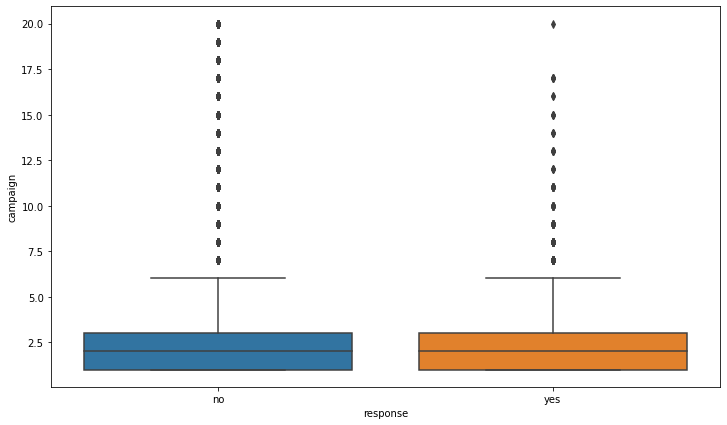

In [233]:
sns.boxplot(x='response', y='campaign', data=dataset_new)

Check the Previous columnn with respect to target variable.

<AxesSubplot:xlabel='response', ylabel='previous'>

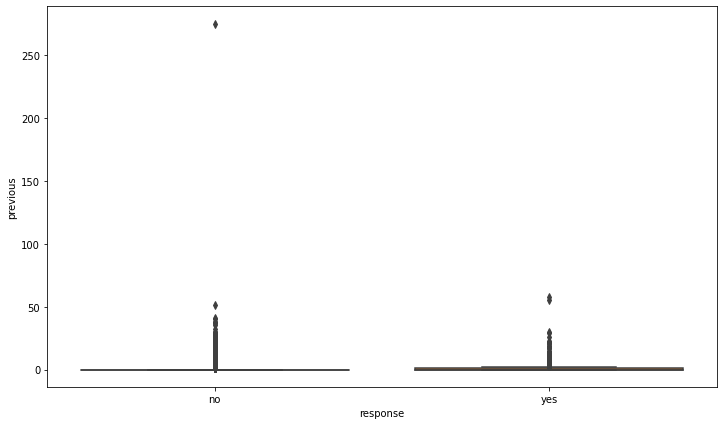

In [234]:
sns.boxplot(x='response', y='previous', data=dataset_new)

Imputing the Previous column values

In [235]:
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

Check the Duration columnn after imputing.

<AxesSubplot:xlabel='response', ylabel='previous'>

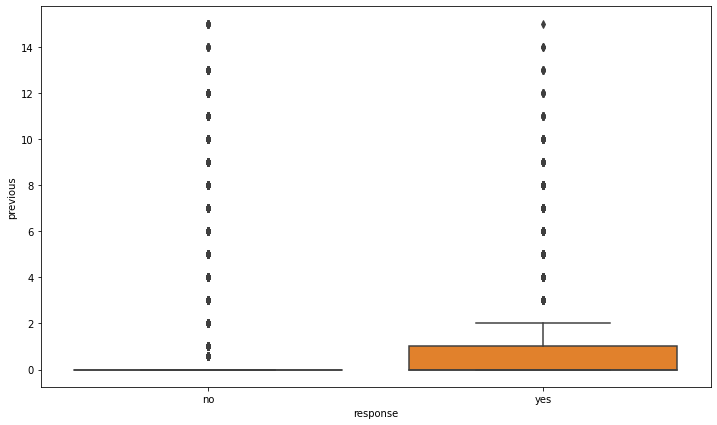

In [236]:
sns.boxplot(x='response', y='previous', data=dataset_new)

## Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [237]:
dataset_new['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Mean = 40, Median or 50% = -1, min = -1 
So the most number of values in the pdays column is -1. It can be that these customers were not contacted in the previous campaign.

## Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [238]:
d1 = dataset_new[dataset_new['pdays'] >= 0]
d1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [239]:
d2 = dataset_new[dataset_new['pdays'] <=0]
d2['pdays'].describe()

count    36954.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: pdays, dtype: float64

## Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='response', ylabel='pdays'>

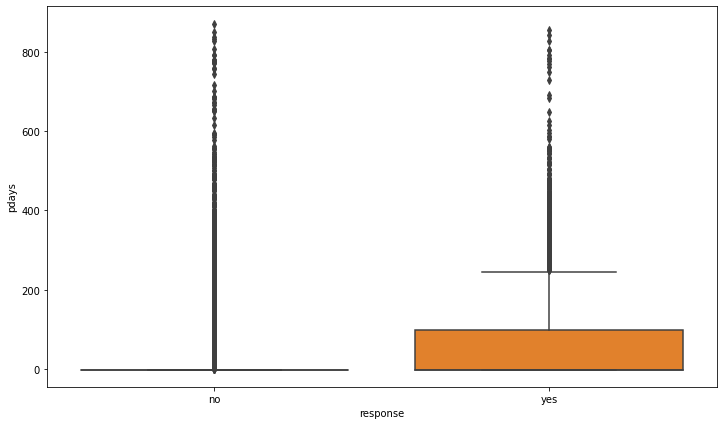

In [240]:
sns.boxplot(x='response', y='pdays', data=dataset_new)

boxplot for values greater than 0 in pdays

<AxesSubplot:xlabel='response', ylabel='pdays'>

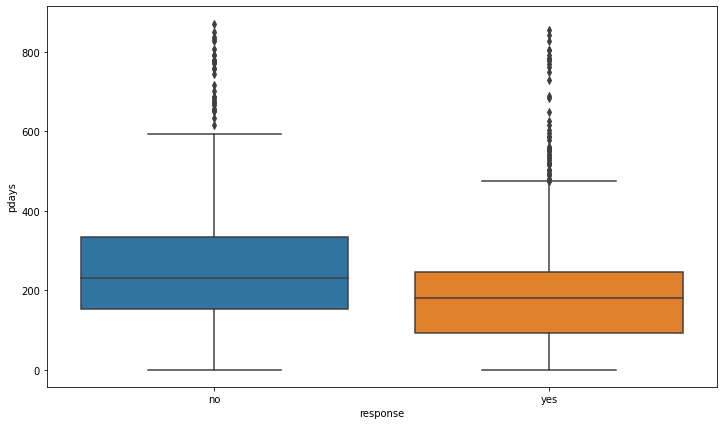

In [241]:
sns.boxplot(x='response', y='pdays', data=d1)

Boxplot for the values in pdays column less than 1

<AxesSubplot:xlabel='response', ylabel='pdays'>

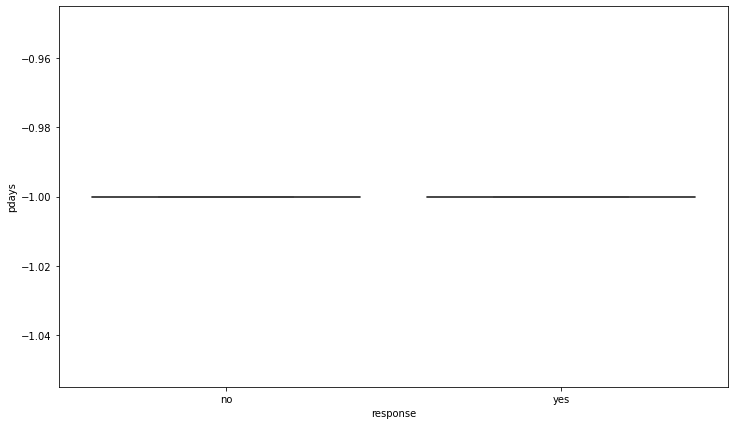

In [242]:
sns.boxplot(x='response', y='pdays', data=d2)

Imputing the pdays column

In [243]:
min_val = 1
max_val = 225
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

<AxesSubplot:xlabel='response', ylabel='pdays'>

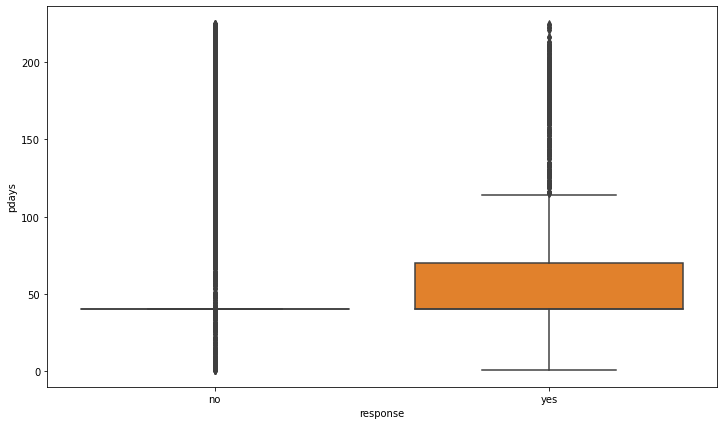

In [244]:
sns.boxplot(x='response', y='pdays', data=dataset_new)

Function to impute the categorical data

In [245]:
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

Checking the job columnn.

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


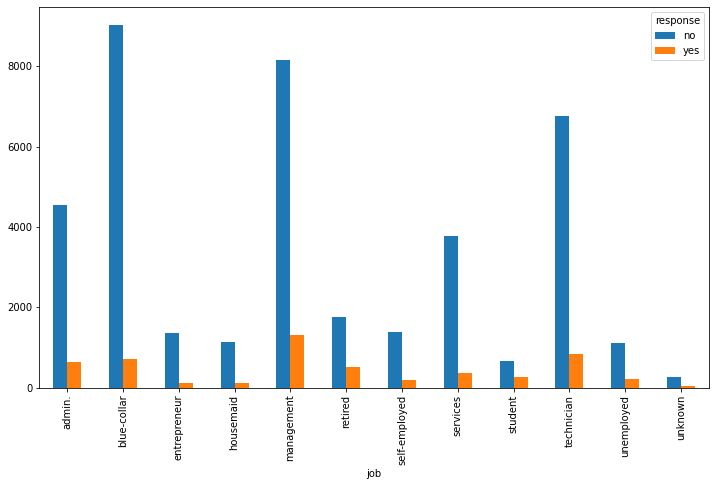

In [246]:
temp1 = pd.crosstab(dataset_new['job'], dataset_new['response'])
temp1.plot(kind='bar')
print(dataset_new.groupby(['job']).size()/len(dataset_new)*100)

Fixing the job column

In [247]:
dataset_new = impute_unknowns(df=dataset_new, column='job')

## Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

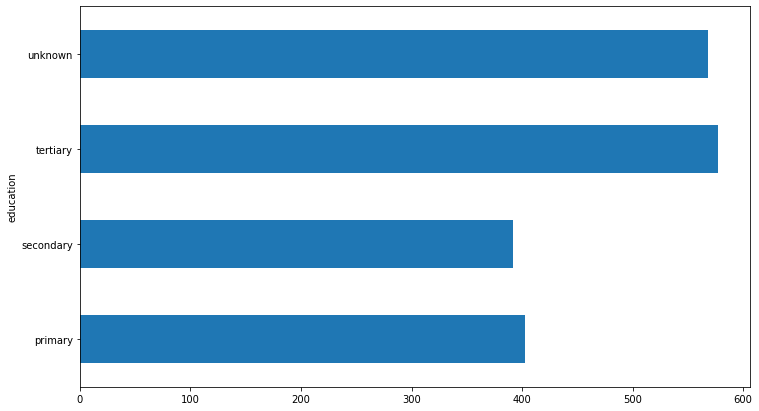

In [248]:
dataset_new.groupby(['education'])['balance'].median().plot.barh()

Education

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


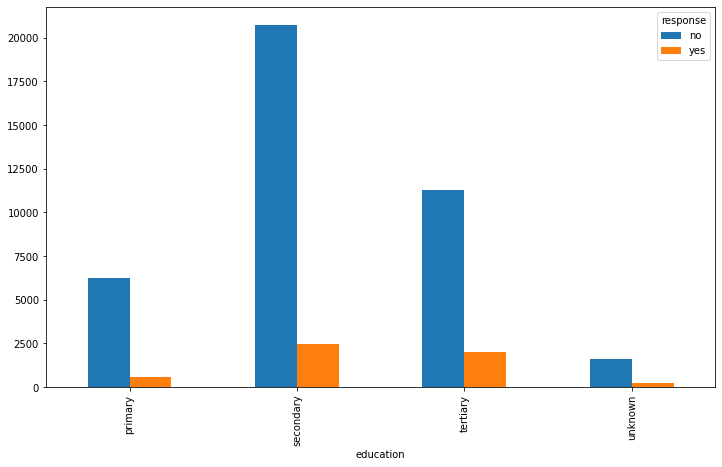

In [249]:
temp3 = pd.crosstab(dataset_new['education'], dataset_new['response'])
temp3.plot(kind='bar')
print(dataset_new.groupby(['education']).size()/len(dataset_new)*100)

Fixing the education column

In [250]:
dataset_new = impute_unknowns(df=dataset_new, column='education')

checking the maritial column

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


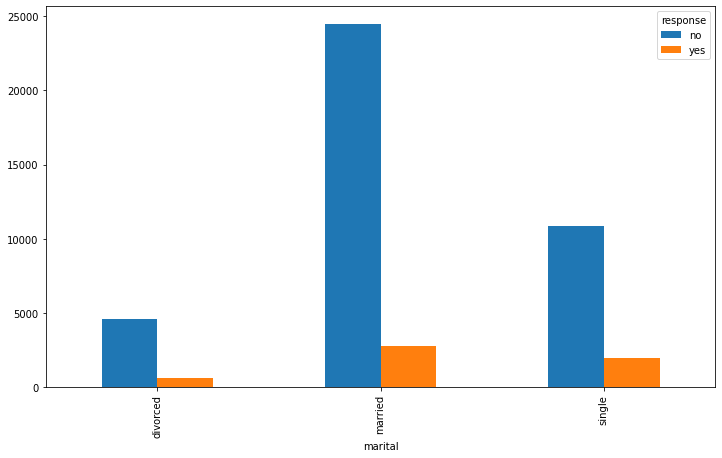

In [251]:
temp2 = pd.crosstab(dataset_new['marital'], dataset_new['response'])
temp2.plot(kind='bar')
print(dataset_new.groupby(['marital']).size()/len(dataset_new)*100)

Checking the default column

default
no     98.197341
yes     1.802659
dtype: float64


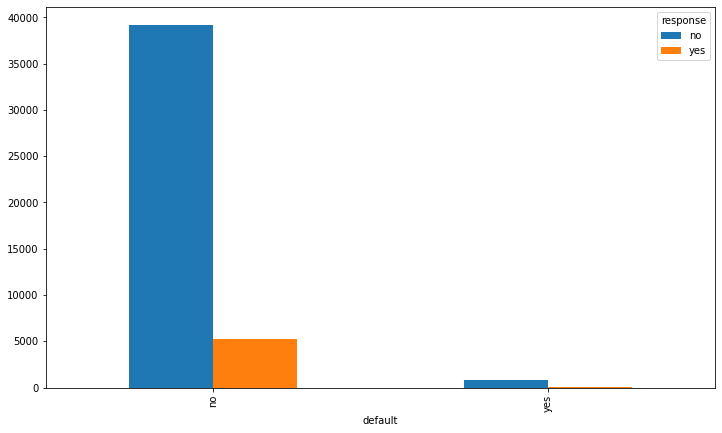

In [252]:
temp4 = pd.crosstab(dataset_new['default'], dataset_new['response'])
temp4.plot(kind='bar')
print(dataset_new.groupby(['default']).size()/len(dataset_new)*100)

The default column is highly unbalanced so its likely we drop this column.

In [253]:
del dataset_new['default']

Housing column

housing
no     44.416182
yes    55.583818
dtype: float64


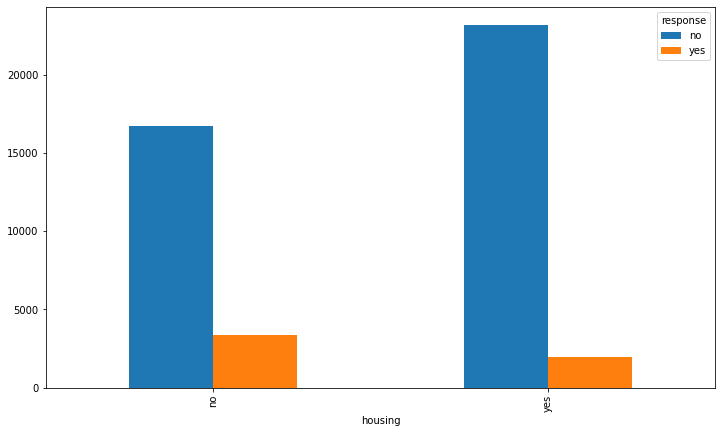

In [254]:
temp5 = pd.crosstab(dataset_new['housing'], dataset_new['response'])
temp5.plot(kind='bar')
print(dataset_new.groupby(['housing']).size()/len(dataset_new)*100)

Contact column

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


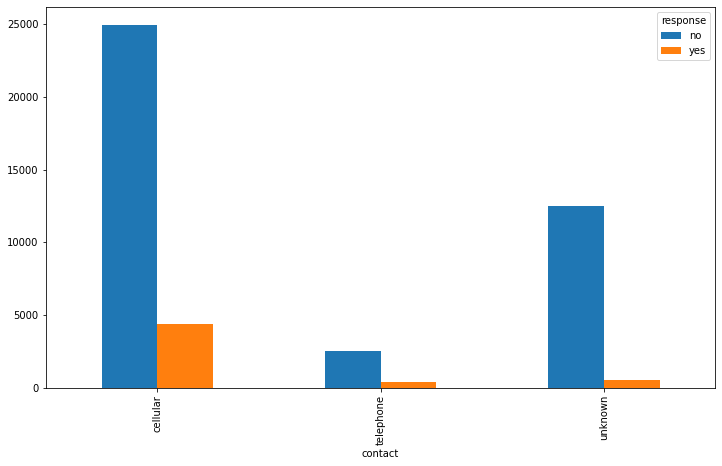

In [255]:
temp6 = pd.crosstab(dataset_new['contact'], dataset_new['response'])
temp6.plot(kind='bar')
print(dataset_new.groupby(['contact']).size()/len(dataset_new)*100)

The contact column is highly unbalanced so its likely we drop this column.

In [256]:
del dataset_new['contact']

Month column

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


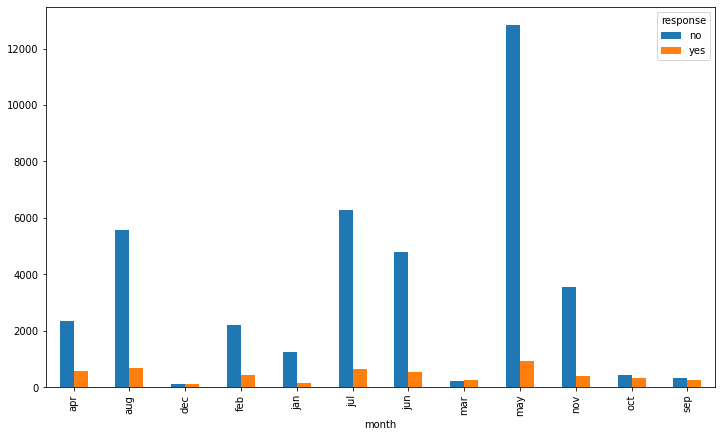

In [257]:
temp7 = pd.crosstab(dataset_new['month'], dataset_new['response'])
temp7.plot(kind='bar')
print(dataset_new.groupby(['month']).size()/len(dataset_new)*100)

Poutcome column

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


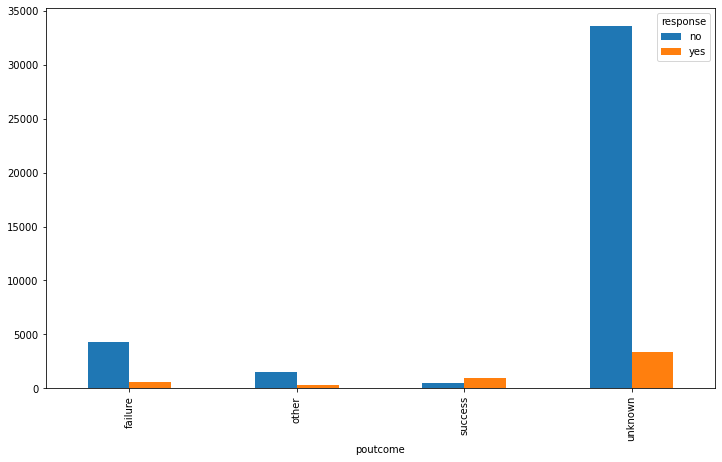

In [258]:
temp8 = pd.crosstab(dataset_new['poutcome'], dataset_new['response'])
temp8.plot(kind='bar')
print(dataset_new.groupby(['poutcome']).size()/len(dataset_new)*100)

We drop this column as maximum values is unknown

In [259]:
del dataset_new['poutcome']

Loan column

loan
no     83.977351
yes    16.022649
dtype: float64


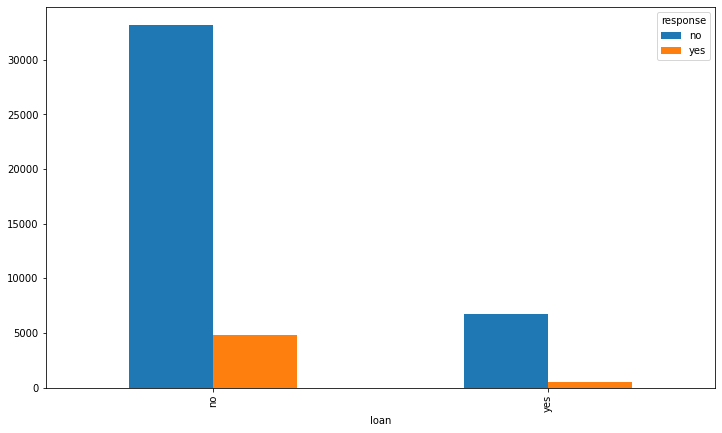

In [260]:
temp9 = pd.crosstab(dataset_new['loan'], dataset_new['response'])
temp9.plot(kind='bar')
print(dataset_new.groupby(['loan']).size()/len(dataset_new)*100)

## First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.

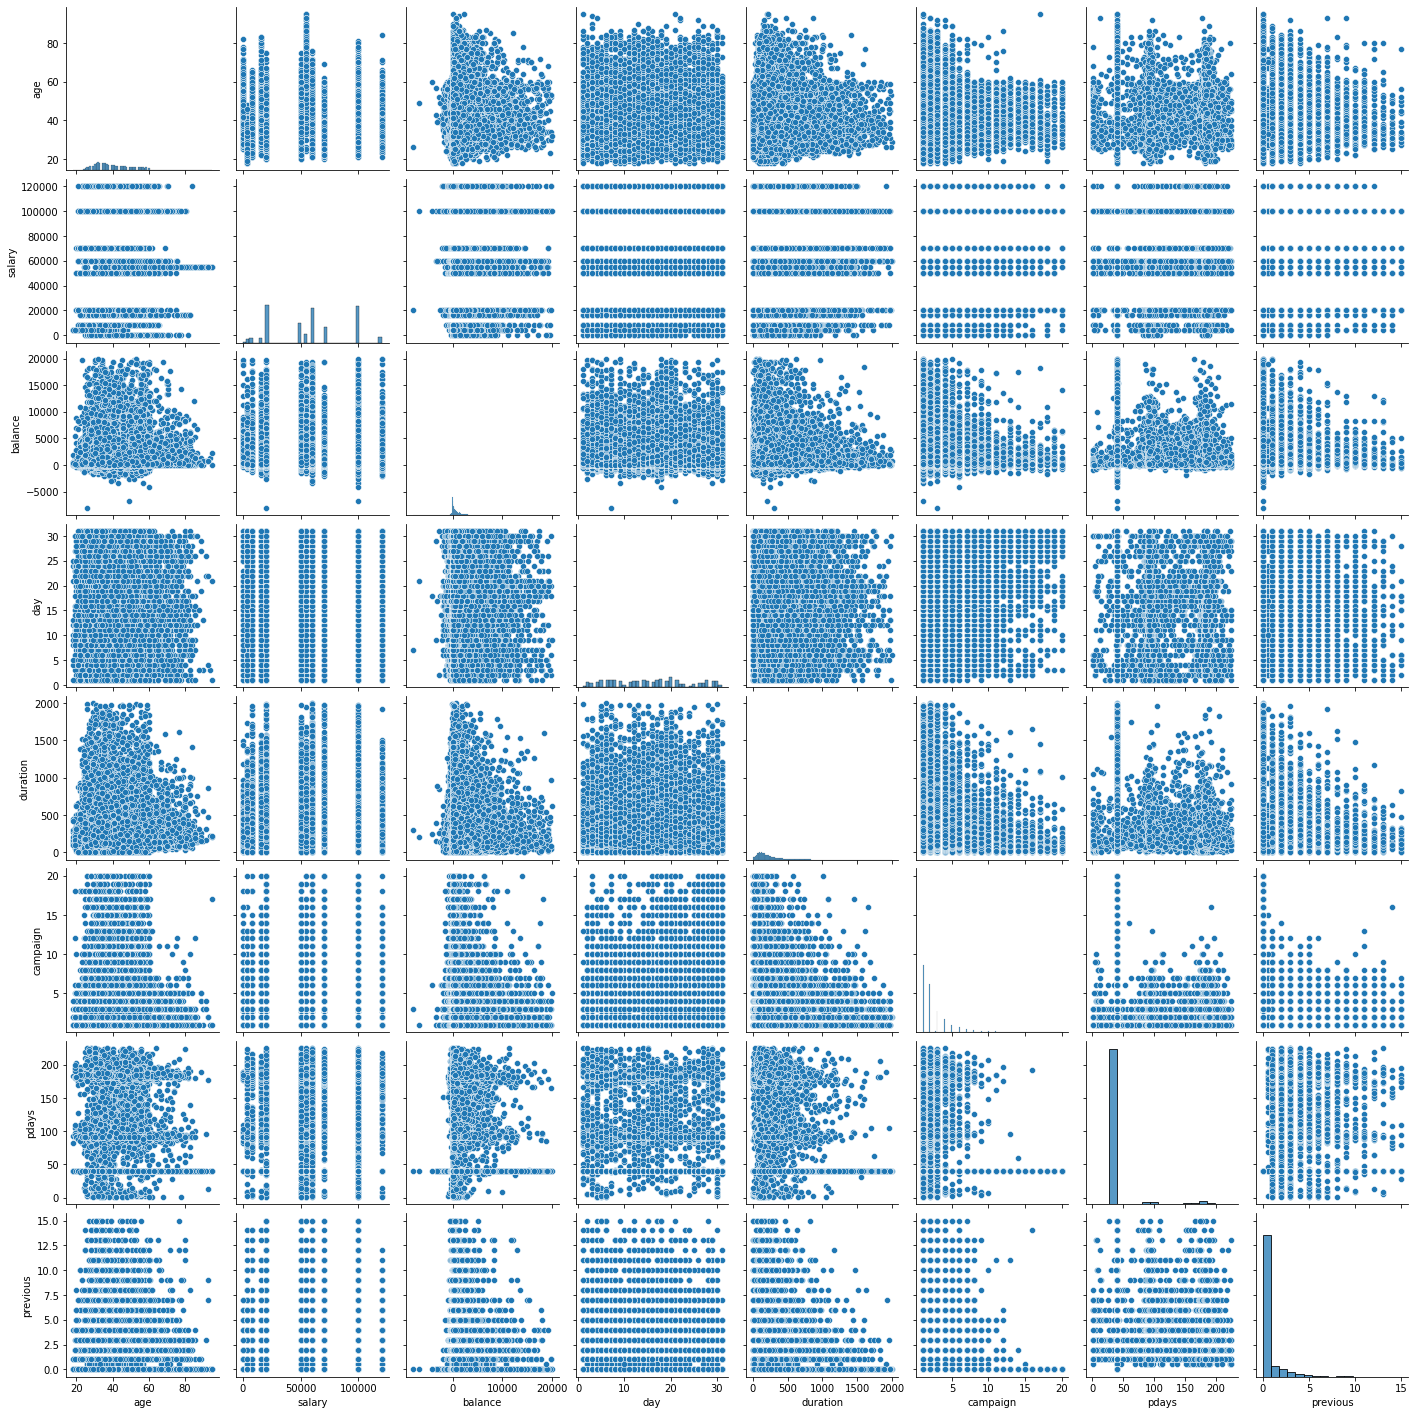

In [261]:
sns.pairplot(data=dataset_new)

Convert the response variable to a convenient form

In [262]:
dataset_new['response']=dataset_new.response.map(dict(yes=1, no=0))

In [279]:
dataset_Y = dataset_new['response']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [280]:
dataset_X.dtypes

age            int64
job           object
salary         int64
marital       object
education     object
targeted      object
balance      float64
housing       object
loan          object
day            int64
month         object
duration     float64
dtype: object

In [281]:
num_col = ['age','salary','balance','duration']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_X[num_col] = sc.fit_transform(dataset_X[num_col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dipes\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [282]:
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

        age    salary   balance  day  duration  job_admin.  job_blue-collar  \
0  1.606965  1.339983  0.408299    5  0.024077           0                0   
1  0.288529  0.093308 -0.546602    5 -0.428990           0                0   
2 -0.747384  1.963320 -0.558798    5 -0.737900           0                0   
3  0.571051 -1.153366  0.120564    5 -0.671999           0                1   
4 -0.747384 -1.776703 -0.559249    5 -0.235407           0                1   

   job_entrepreneur  job_housemaid  job_management  ...  month_dec  month_feb  \
0                 0              0               1  ...          0          0   
1                 0              0               0  ...          0          0   
2                 1              0               0  ...          0          0   
3                 0              0               0  ...          0          0   
4                 0              0               0  ...          0          0   

   month_jan  month_jul  month_jun  mo

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_X_dummy, dataset_Y, test_size=0.2, random_state=111)

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Train accuracy:',lr.score(X_train,y_train))
print('Test accuracy:',lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
target_names = ['Yes','No']
print(classification_report(y_test, y_pred, target_names=target_names))

Train accuracy: 0.8919210351692104
Test accuracy: 0.8948357845847617
[[7800  175]
 [ 776  292]]
              precision    recall  f1-score   support

         Yes       0.91      0.98      0.94      7975
          No       0.63      0.27      0.38      1068

    accuracy                           0.89      9043
   macro avg       0.77      0.63      0.66      9043
weighted avg       0.88      0.89      0.88      9043



C:\Users\dipes\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [298]:
from sklearn.ensemble import RandomForestClassifier
rfr1 = RandomForestClassifier()
rfr1.fit(X_train,y_train)
print('Train accuracy',rfr1.score(X_train,y_train))
print('Test accuracy:',rfr1.score(X_test,y_test))
y_pred = rfr1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred, target_names=target_names))

Train accuracy 1.0
Test accuracy: 0.8961627778392126
[[7762  213]
 [ 726  342]]
              precision    recall  f1-score   support

         Yes       0.91      0.97      0.94      7975
          No       0.62      0.32      0.42      1068

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [296]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
print('Train accuracy',neigh.score(X_train,y_train))
print('Test accuracy:',neigh.score(X_test,y_test))
y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred, target_names=target_names))

Train accuracy 1.0
Test accuracy: 0.8682959194957426
[[7464  511]
 [ 680  388]]
              precision    recall  f1-score   support

         Yes       0.92      0.94      0.93      7975
          No       0.43      0.36      0.39      1068

    accuracy                           0.87      9043
   macro avg       0.67      0.65      0.66      9043
weighted avg       0.86      0.87      0.86      9043



In [300]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(loss='exponential')
gbr.fit(X_train,y_train)
print('Train accuracy',gbr.score(X_train,y_train))
print('Test accuracy:',gbr.score(X_test,y_test))
y_pred = gbr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred, target_names=target_names))

Train accuracy 0.898363193983632
Test accuracy: 0.899922592060157
[[7789  186]
 [ 719  349]]
              precision    recall  f1-score   support

         Yes       0.92      0.98      0.95      7975
          No       0.65      0.33      0.44      1068

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [302]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
print('Train accuracy',clf.score(X_train,y_train))
print('Test accuracy:',clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred, target_names=target_names))

Train accuracy 0.8901515151515151
Test accuracy: 0.8917394669910428
[[7733  242]
 [ 737  331]]
              precision    recall  f1-score   support

         Yes       0.91      0.97      0.94      7975
          No       0.58      0.31      0.40      1068

    accuracy                           0.89      9043
   macro avg       0.75      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043

